In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d
import astropy.units as u
import astropy.constants as c
from astropy.table import Table

In [2]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

In [3]:
paschenlines = np.array([1.00521, 1.09411, 1.28216]) * u.micron #, 1.87561])
brackettlines = np.array([1.51374, 1.51960, 1.52647, 1.53460, 1.54431, 1.55607, 1.57050, 1.58849, 1.61137, \
                         1.64117, 1.68111, 1.73669, 1.81791, 1.94509, 2.16612]) * u.micron
pfundlines = np.array([2.32979, 2.33296, 2.33644, 2.34028, 2.34453, 2.34924, 2.35448, 2.36035, 2.36694]) * u.micron

In [4]:
standard_data = np.load("./standard/standard_star_reduced_median_0500_07.npy", allow_pickle = True).item()

In [5]:
object_b = {}
for i in range(3,8):
    t = Table()
    temp = np.load("./objectB/obs1216_order"+str(i)+".npy")
    t["wavelength"] = temp[0] * u.micron
    t["reduced"] = temp[1] * u.count / u.second
    t["flux"] = standard_data[i]["correction"] * t["reduced"]
    object_b[i] = t
    

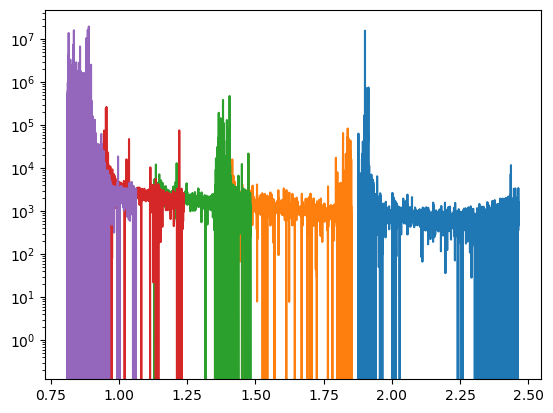

In [6]:
wavelength = []
flux = []
counts = []
for i in range(3,8):
    order_data = object_b[i]
    plt.plot(order_data["wavelength"], order_data["flux"])
    plt.yscale("log")

    wavelength = np.append(wavelength, order_data["wavelength"])
    flux = np.append(flux, order_data["flux"])
    counts = np.append(counts, order_data["reduced"])

spectra = Table()
spectra["wavelength"] = wavelength
spectra["flux"] = flux
spectra["counts"] = counts
spectra.sort("wavelength")

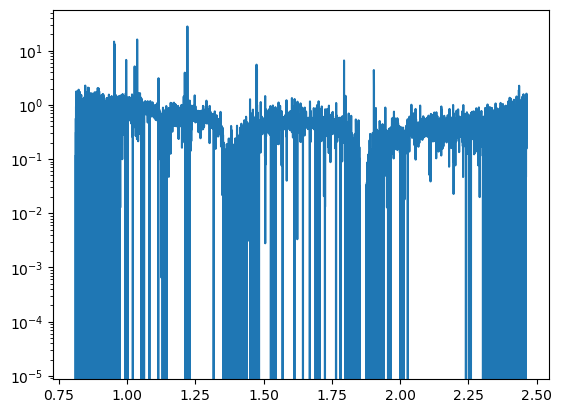

In [7]:
plt.plot(spectra["wavelength"], spectra["counts"])
plt.yscale("log")

In [8]:
lambdas = spectra["wavelength"].data * u.micron
spec = spectra["counts"].data * u.count/u.second
spec = spectra["flux"].data * u.photon/u.second

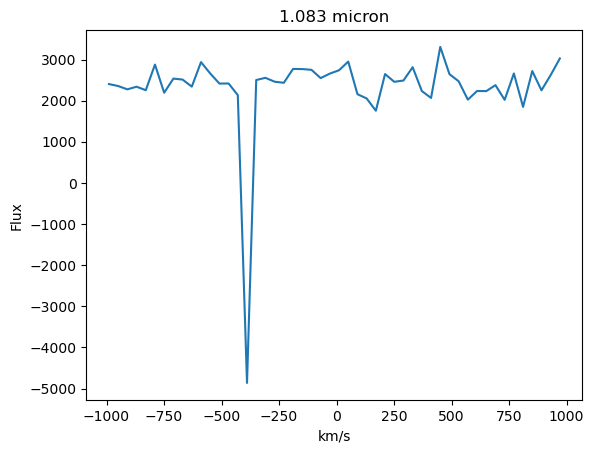

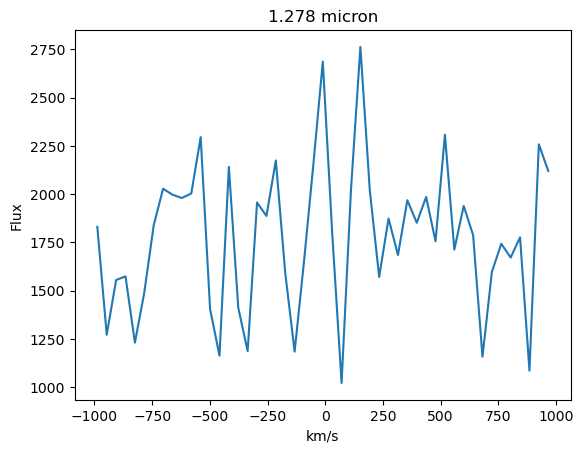

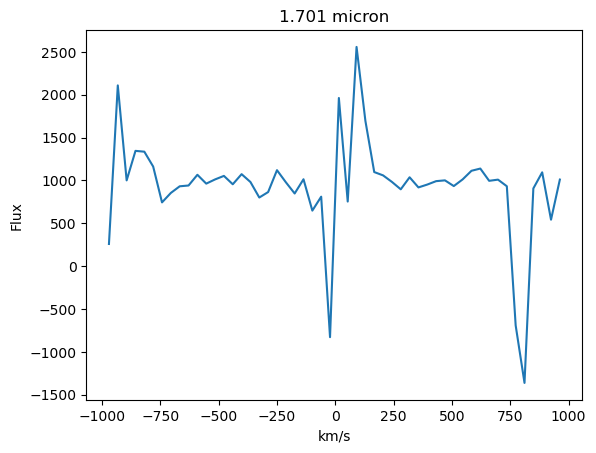

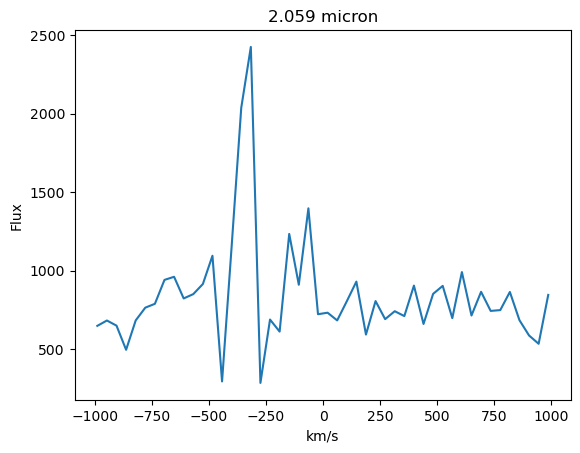

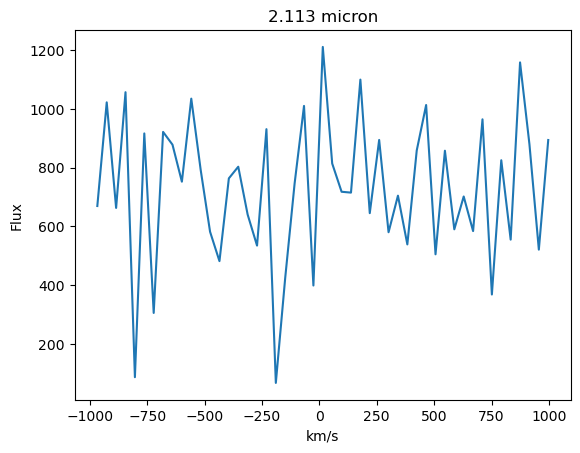

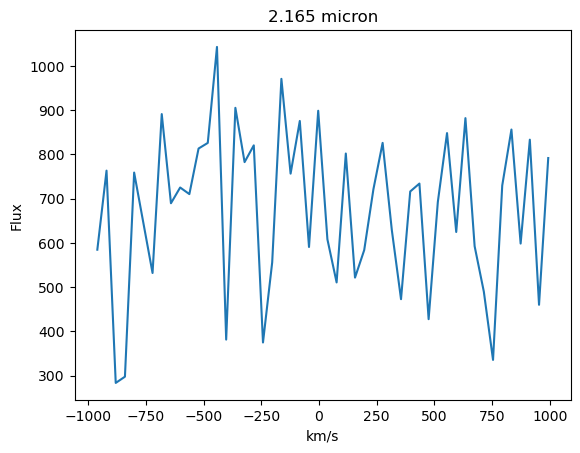

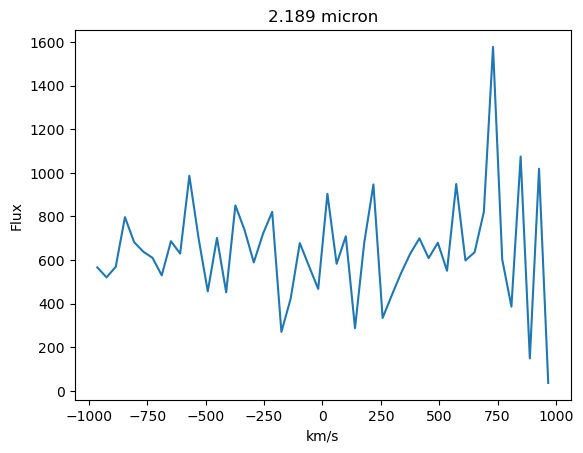

In [10]:
window = 50 * u.nm
HeI_lines = np.array([1.083, 1.278, 1.701, 2.059, 2.113, 2.165, 2.189]) * u.micron
CIII_lines = np.array([1.1985, 1.253, 1.258, 2.085, 2.114, 2.325]) * u.micron
for line in HeI_lines:
    vsrange = np.array([-1000, 1000]) * u.km/u.second
    velocity = ((lambdas - line)/line * c.c).to(u.km/u.second)
    indexes = np.where((velocity > np.min(vsrange)) & (velocity < np.max(vsrange)))
    relevant_v = velocity[indexes]
    relevant_f = spec[indexes]
    plt.plot(relevant_v, relevant_f)
    plt.title(line)
    plt.ylabel("Flux")
    plt.xlabel("km/s")
    plt.show()
